Descripción del proyecto:

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.


In [99]:
import pandas as pd
import numpy as np 
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import levene
from scipy.stats import ttest_ind


In [3]:
df_games = pd.read_csv('./datasets/games.csv')

In [4]:
df_games.head()



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


PREPARAR LOS DATOS: 








In [6]:
df_games.columns = ['name', 'platform', 'year_of_release','genre','na_sales','eu_sales','jp_sales','other_sales','critic_score',
                   'user_score','rating']
df_games


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Convercion de los datos a los tipos necesarios.

In [7]:
# Reemplazar valores nulos con un valor por defecto (opcional, ajusta según tu contexto)
df_games['year_of_release'] = df_games['year_of_release'].fillna(0)

# Convertir a int (forzando si es necesario)
df_games['year_of_release'] = df_games['year_of_release'].astype(int)



In [8]:
# Convertir 'year_of_release' a datetime, manejando valores nulos
df_games['year_of_release'] = pd.to_datetime(df_games['year_of_release'], format='%Y', errors='coerce')

df_games['year_of_release'].dt.year


df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')


df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


In [9]:
df_games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9814,Dishonored 2,PC,2016-01-01,Action,0.04,0.07,0.00,0.01,86.0,6.0,M
8141,Pirates: Hunt For Blackbeard's Booty,Wii,2008-01-01,Adventure,0.08,0.08,0.00,0.02,NaN,NaN,E
16001,Saenai Kanojo no Sodatekata: Blessing Flowers,PSV,2015-01-01,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN
16177,Destiny Links,DS,2009-01-01,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
12577,Rock Blast,DS,2008-01-01,Puzzle,0.06,0.00,0.00,0.00,NaN,NaN,E
13109,The Typing of the Dead,DC,2000-01-01,Shooter,0.00,0.00,0.05,0.00,83.0,7.8,M
3419,Ben 10: Alien Force,PSP,2008-01-01,Action,0.35,0.13,0.00,0.10,NaN,7.7,E10+
10305,Astro Boy: The Video Game,Wii,2009-01-01,Action,0.10,0.00,0.00,0.01,48.0,3.5,E10+
8011,Super Robot Taisen J,GBA,2005-01-01,Strategy,0.00,0.00,0.18,0.00,NaN,NaN,NaN
11196,Henry Hatsworth in the Puzzling Adventure,DS,2009-01-01,Puzzle,0.08,0.00,0.00,0.01,82.0,8.0,E


Calculo de las ventas totales (la suma de las ventas en todas las regiones) para cada juego y creacion de una columna separada.

In [10]:

df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

sales_per_game = df_games.groupby(['name'])[['total_sales']].sum().reset_index()

print(sales_per_game)


                               name  total_sales
0                    Beyblade Burst         0.03
1                 Fire Emblem Fates         1.67
2              Frozen: Olaf's Quest         1.10
3        Haikyu!! Cross Team Match!         0.04
4                 Tales of Xillia 2         0.84
...                             ...          ...
11554    thinkSMART: Chess for Kids         0.01
11555                  uDraw Studio         2.42
11556  uDraw Studio: Instant Artist         0.19
11557    wwe Smackdown vs. Raw 2006         3.00
11558  ¡Shin Chan Flipa en colores!         0.14

[11559 rows x 2 columns]


In [11]:
df_games['user_score']

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: float64

In [12]:
median_score = df_games['user_score'].median()

In [13]:
df_games['user_score'] = df_games['user_score'].fillna(median_score)

In [14]:
df_games['user_score'].isna().sum()

0

Analisis de datos

In [15]:
game_x_year = df_games.groupby(df_games['year_of_release'].dt.year)['name'].count().reset_index

game_x_year


<bound method Series.reset_index of year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64>

Hay un incremento considerable en la produccion de videjuegos a partir del año 1995 

Variacion de las ventas de una plataforma a otra. 

In [16]:
sales_per_platform = df_games.groupby(['platform'])[['total_sales']].sum().sort_values(by = ['total_sales'])

sales_per_platform

,total_sales
platform,
PCFX,0.03
GG,0.04
3DO,0.10
TG16,0.16
WS,1.42
NG,1.44
SCD,1.86
DC,15.95
GEN,30.77


In [17]:
# Obtener las 5 plataformas con mayores ventas totales
top_5_platforms = sales_per_platform.nlargest(5, 'total_sales')

# Mostrar el resultado
print(top_5_platforms)


          total_sales
platform             
PS2           1255.77
X360           971.42
PS3            939.65
Wii            907.51
DS             806.12


In [18]:
top_5_platform_names = top_5_platforms.index
df_top_5_platforms = df_games[df_games['platform'].isin(top_5_platform_names)]

distribution = df_top_5_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

print(distribution.head(10))



  year_of_release platform  total_sales
0      1985-01-01       DS         0.02
1      2000-01-01      PS2        39.17
2      2001-01-01      PS2       166.43
3      2002-01-01      PS2       205.38
4      2003-01-01      PS2       184.31
5      2004-01-01       DS        17.27
6      2004-01-01      PS2       211.81
7      2005-01-01       DS       130.14
8      2005-01-01      PS2       160.66
9      2005-01-01     X360         8.25


c:\Users\anton\OneDrive\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anton\OneDrive\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


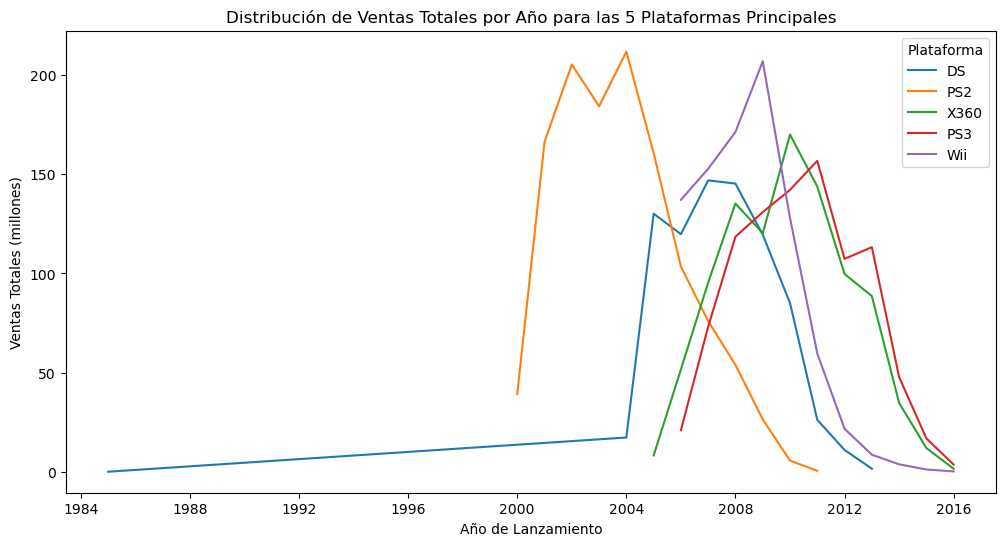

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=distribution, x='year_of_release', y='total_sales', hue='platform')

# Etiquetas y título
plt.title('Distribución de Ventas Totales por Año para las 5 Plataformas Principales')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (millones)')
plt.legend(title='Plataforma')
plt.show()

Se Buscan las plataformas que perdieron relevancia en el mercado.

In [20]:
last_year_sales = df_games.groupby('platform')['year_of_release'].max().reset_index()
last_year_sales.columns = ['platform', 'last_year_with_sales']

print(last_year_sales)

   platform last_year_with_sales
0      2600           1989-01-01
1       3DO           1995-01-01
2       3DS           2016-01-01
3        DC           2008-01-01
4        DS           2013-01-01
5        GB           2001-01-01
6       GBA           2007-01-01
7        GC           2007-01-01
8       GEN           1994-01-01
9        GG           1992-01-01
10      N64           2002-01-01
11      NES           1994-01-01
12       NG           1996-01-01
13       PC           2016-01-01
14     PCFX           1996-01-01
15       PS           2003-01-01
16      PS2           2011-01-01
17      PS3           2016-01-01
18      PS4           2016-01-01
19      PSP           2015-01-01
20      PSV           2016-01-01
21      SAT           1999-01-01
22      SCD           1994-01-01
23     SNES           1999-01-01
24     TG16           1995-01-01
25       WS           2001-01-01
26      Wii           2016-01-01
27     WiiU           2016-01-01
28     X360           2016-01-01
29       X

In [21]:
last_year_sales['last_year_with_sales'] = last_year_sales['last_year_with_sales'].dt.year

latest_year = df_games['year_of_release'].dt.year.max()

obsolete_platforms = last_year_sales[last_year_sales['last_year_with_sales'] < latest_year - 5]

print(obsolete_platforms)

   platform  last_year_with_sales
0      2600                  1989
1       3DO                  1995
3        DC                  2008
5        GB                  2001
6       GBA                  2007
7        GC                  2007
8       GEN                  1994
9        GG                  1992
10      N64                  2002
11      NES                  1994
12       NG                  1996
14     PCFX                  1996
15       PS                  2003
21      SAT                  1999
22      SCD                  1994
23     SNES                  1999
24     TG16                  1995
25       WS                  2001
29       XB                  2008


In [43]:
platform_lifecycle = df_games.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
platform_lifecycle.columns = ['platform', 'first_year_with_sales', 'last_year_with_sales']


diferencia = platform_lifecycle['last_year_with_sales'] - platform_lifecycle['first_year_with_sales']

platform_lifecycle['lifecycle_years'] = diferencia.dt.days / 365.25 

print(platform_lifecycle)


   platform first_year_with_sales last_year_with_sales  lifecycle_years
0      2600            1980-01-01           1989-01-01         9.002053
1       3DO            1994-01-01           1995-01-01         0.999316
2       3DS            2011-01-01           2016-01-01         4.999316
3        DC            1998-01-01           2008-01-01         9.998631
4        DS            1985-01-01           2013-01-01        28.000000
5        GB            1988-01-01           2001-01-01        13.002053
6       GBA            2000-01-01           2007-01-01         7.000684
7        GC            2001-01-01           2007-01-01         5.998631
8       GEN            1990-01-01           1994-01-01         4.000000
9        GG            1992-01-01           1992-01-01         0.000000
10      N64            1996-01-01           2002-01-01         6.001369
11      NES            1983-01-01           1994-01-01        11.000684
12       NG            1993-01-01           1996-01-01         2

In [54]:
platform_lifecycle_sorted = platform_lifecycle.sort_values('lifecycle_years')

In [55]:
avg_lifecycle = platform_lifecycle['lifecycle_years'].mean()
median_lifecycle = platform_lifecycle['lifecycle_years'].median()

print('la vida promedio de las plataformas es de', avg_lifecycle)
print('la vida mediana de las plataformas es de', median_lifecycle)


la vida promedio de las plataformas es de 7.612549954737143
la vida mediana de las plataformas es de 6.0013689253935665


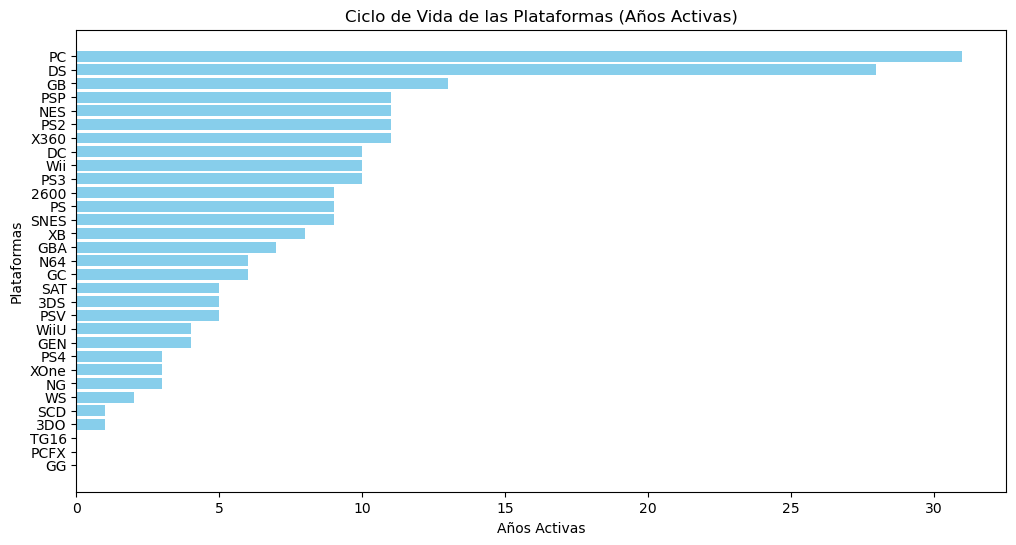

In [56]:
plt.figure(figsize=(12, 6))
plt.barh(platform_lifecycle_sorted['platform'], platform_lifecycle_sorted['lifecycle_years'], color='skyblue')

plt.title('Ciclo de Vida de las Plataformas (Años Activas)')
plt.xlabel('Años Activas')
plt.ylabel('Plataformas')
plt.show()


 
La vida promedio de las plataformas es de 7.6 años
La vida mediana de las plataformas es de 6.0 años




Las plataformas lideres son: 
PS2     con      1255.77 ventas
X360    con       971.42 ventas
PS3     con       939.65 ventas
Wii     con       907.51 ventas
DS      con       806.12 ventas

estas ultimas son las mas rentables. 

Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. 


In [25]:
sales_x_year_x_name = df_games.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()
sales_x_year_x_name.head()

,year_of_release,platform,total_sales
0,1980-01-01,2600,11.38
1,1981-01-01,2600,35.68
2,1982-01-01,2600,28.88
3,1983-01-01,2600,5.84
4,1983-01-01,NES,10.96


In [62]:
print(sales_x_year_x_name['total_sales'].mean())


37.045336134453784


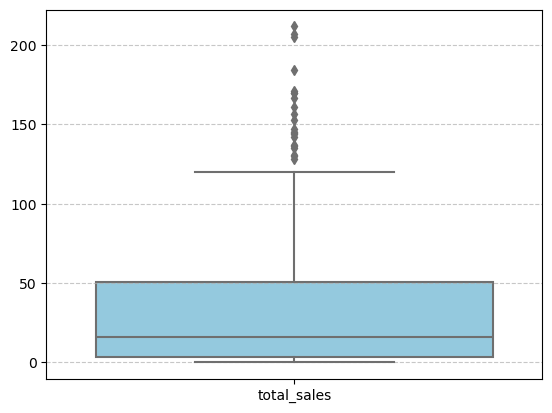

In [57]:
sns.boxplot(data=sales_x_year_x_name,
                color='skyblue', 
                saturation=0.75)
plt.grid(axis='y', linestyle='--', alpha=0.7)




Se encuentran diferencias significativas en las ventas

Las ventas promedio son muy bajas a comparacion a los valores atipicos, se podria decir que en general los video juegos son mas rentables cuando se tiene un muy buen exito con algun juego particular. 

Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. 


In [77]:
ps2_games = df_games[df_games['platform'] == 'PS2'].copy()  


ps2_games.loc[:, 'critic_score'] = pd.to_numeric(ps2_games['critic_score'], errors='coerce')
ps2_games.loc[:, 'user_score'] = pd.to_numeric(ps2_games['user_score'], errors='coerce')


ps2_games = ps2_games.dropna(subset=['critic_score', 'user_score', 'total_sales'])

ps2_games.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
17,Grand Theft Auto: San Andreas,PS2,2004-01-01,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002-01-01,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001-01-01,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001-01-01,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
48,Gran Turismo 4,PS2,2004-01-01,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65


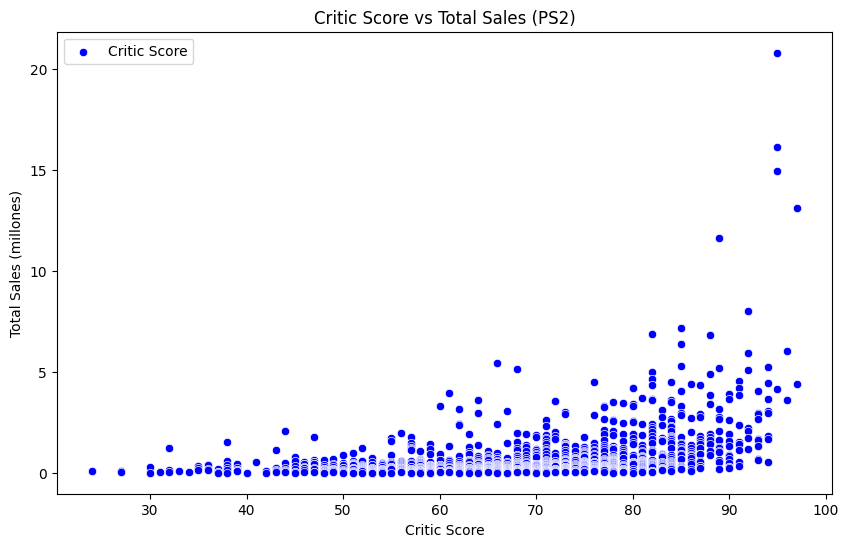

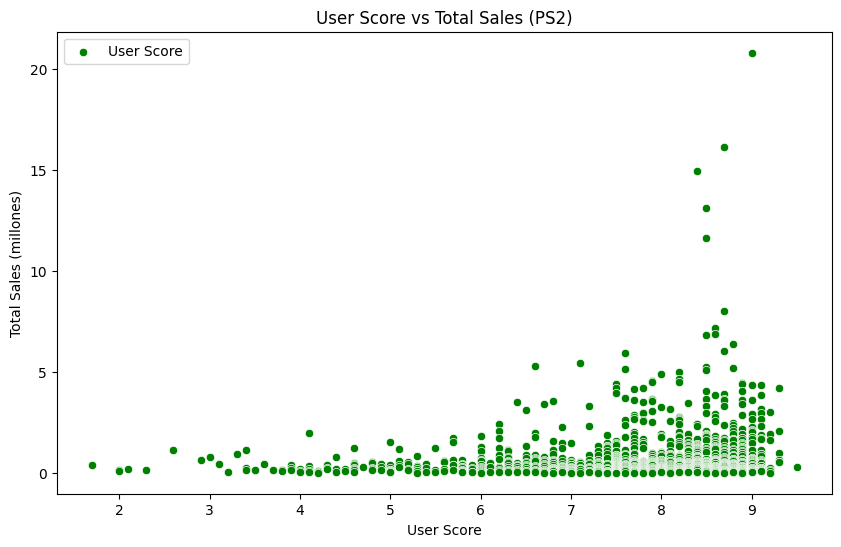

In [ ]:


# Gráfico de dispersión: Critic Score vs Total Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ps2_games, x='critic_score', y='total_sales', color='blue', label='Critic Score')
plt.title('Critic Score vs Total Sales (PS2)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millones)')
plt.legend()
plt.show()

# Gráfico de dispersión: User Score vs Total Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ps2_games, x='user_score', y='total_sales', color='green', label='User Score')
plt.title('User Score vs Total Sales (PS2)')
plt.xlabel('User Score')
plt.ylabel('Total Sales (millones)')
plt.legend()
plt.show()


In [ ]:
# Calcular la correlación entre Critic Score y Total Sales
critic_corr = ps2_games['critic_score'].corr(ps2_games['total_sales'])

# Calcular la correlación entre User Score y Total Sales
user_corr = ps2_games['user_score'].corr(ps2_games['total_sales'])

print(f"Correlación entre Critic Score y Total Sales: {critic_corr:.2f}")
print(f"Correlación entre User Score y Total Sales: {user_corr:.2f}")


Correlación entre Critic Score y Total Sales: 0.40
Correlación entre User Score y Total Sales: 0.17


Conclusiones:

La relacion entre los puntajes(de usuarios y criticos) y las ventas totales de los juegos tienen es muy baja, la de los puntajes tiene una influencia muy baja, por lo cual no se podria decir que es una variable significativa para el exito de un juego en la plataforma de PS2.


Teniendo en cuenta estas conclusiones se comparara las ventas del mismos juego en otras plataformas.

In [ ]:
GTA_SA = df_games[df_games['name'] == 'Grand Theft Auto: San Andreas'].copy()

GTA_SA = GTA_SA.dropna(subset=['name', 'platform', 'total_sales'])

GTA_SA.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
17,Grand Theft Auto: San Andreas,PS2,2004-01-01,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
875,Grand Theft Auto: San Andreas,XB,2005-01-01,Action,1.26,0.61,0.00,0.09,93.0,8.6,AO,1.96
2115,Grand Theft Auto: San Andreas,PC,2005-01-01,Action,0.00,0.93,0.00,0.04,93.0,8.9,M,0.97
10311,Grand Theft Auto: San Andreas,X360,2008-01-01,Action,0.08,0.02,0.00,0.01,NaN,7.5,M,0.11


In [91]:
Generos_mas_vendidos = df_games.groupby(['genre'])['total_sales'].sum()

print(Generos_mas_vendidos)


genre
Action          1744.17
Adventure        237.59
Fighting         447.53
Misc             802.51
Platform         827.77
Puzzle           242.57
Racing           728.67
Role-Playing     934.56
Shooter         1052.45
Simulation       389.97
Sports          1331.27
Strategy         174.23
Name: total_sales, dtype: float64


Se observa que los generos mas vendidos son los de "Action", "Sports" y "Shooter"  y los menos vendidos son "Aventure", strategy" y "Puzzle". 

Se crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) se determinara: las cinco plataformas principales, los cinco generos principales y Si las clasificaciones de ESRB afectan las ventas 




Las cinco plataformas principales. 


In [94]:
na_sales_x_platform = df_games.groupby(['platform'])['na_sales'].sum().sort_values()
eu_sales_x_platform = df_games.groupby(['platform'])['eu_sales'].sum().sort_values()
jp_sales_x_platform = df_games.groupby(['platform'])['jp_sales'].sum().sort_values()



In [97]:
na_sales_x_platform.tail()


platform
DS      382.40
PS3     393.49
Wii     496.90
PS2     583.84
X360    602.47
Name: na_sales, dtype: float64

In [ ]:
eu_sales_x_platform.tail()

platform
PS      213.61
Wii     262.21
X360    270.76
PS3     330.29
PS2     339.29
Name: eu_sales, dtype: float64

In [ ]:
jp_sales_x_platform.tail()

platform
3DS     100.67
SNES    116.55
PS2     139.20
PS      139.82
DS      175.57
Name: jp_sales, dtype: float64

Descripcion de las variaciones en sus cuotas de mercado de una región a otra: 

En las ventas de NA se observa que Xbox tiene una ligera ventaja sobre PS2, pero se puede entender que son los mas grandes competidores en el mercado, dejando atras Al wii, ps3 y DS, 

Por otra parte en las ventas de EU se puede obsevar que el PS2 y el PS3 son las plataformas preferidas por el publico sin embargo Xbox sigue estando atras de estos dos denjando al wii y PS  al final, aqui no tenemos la presencia del DS como en NA, 

Y por ultimo en JP podemos observar que las plataformas como DS, PS y PS2 son las mas predominantes en el mercado, tambien vemos la presencia de SNES Y 3DS en el mercado dejando fuera del mercado a Xbox entre los 5 mas vendidos. 

Es importante mencionar que las ventas de cada usuario son distiantas probablemente por la cantidad de poblacion en cada area. 



Los cinco géneros principales. 


In [ ]:
na_sales_x_genre = df_games.groupby(['genre'])['na_sales'].sum().sort_values()
eu_sales_x_genre = df_games.groupby(['genre'])['eu_sales'].sum().sort_values()
jp_sales_x_genre = df_games.groupby(['genre'])['jp_sales'].sum().sort_values()


In [ ]:
na_sales_x_genre.tail()

genre
Misc        407.27
Platform    445.50
Shooter     592.24
Sports      684.43
Action      879.01
Name: na_sales, dtype: float64

In [ ]:
eu_sales_x_genre.tail()

genre
Misc       212.74
Racing     236.51
Shooter    317.34
Sports     376.79
Action     519.13
Name: eu_sales, dtype: float64

In [ ]:
jp_sales_x_genre.tail()

genre
Misc            108.11
Platform        130.83
Sports          135.54
Action          161.43
Role-Playing    355.41
Name: jp_sales, dtype: float64

Explica la diferencia.

En las ventas por genero podemos observar que en NA y EU las ventas mas prominentes vienen de los generos Action, sports y Shooter en ese orden respectivo, y en el unico genero que se diferencian es en el 4to lugar en donde eu tiene Racing y NA tiene Platform, sin embargo el utltimo lugar es el mismo en los dos, 

Por otra parte JP tiene una lista diferente, se observa que en el primer lugar se tiene Role-playing y los demas resultados resultan identicos a estados unidos con la excepcion de shooter, 

Como se menciono en la descripcion pasada la cantidad de ventas puede variar por la cantidad de poblacion en cada sector. 


Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [ ]:
na_sales_x_genre = df_games.groupby(['rating'])['na_sales'].sum().reset_index()
eu_sales_x_genre = df_games.groupby(['rating'])['eu_sales'].sum().reset_index()
jp_sales_x_genre = df_games.groupby(['rating'])['jp_sales'].sum().reset_index()

In [ ]:
na_sales_x_genre

,rating,na_sales
0,AO,1.26
1,E,1292.99
2,E10+,353.32
3,EC,1.53
4,K-A,2.56
5,M,748.48
6,RP,0.00
7,T,759.75


In [ ]:
eu_sales_x_genre

,rating,eu_sales
0,AO,0.61
1,E,710.25
2,E10+,188.52
3,EC,0.11
4,K-A,0.27
5,M,483.97
6,RP,0.08
7,T,427.03


In [ ]:
jp_sales_x_genre

,rating,jp_sales
0,AO,0.00
1,E,198.11
2,E10+,40.20
3,EC,0.00
4,K-A,1.46
5,M,64.24
6,RP,0.00
7,T,151.40


En cada region se puede observar que el rating E es la que mas se vende, esto se puede atribuir a que la E es indicativo de everybody= para todos, por lo tanto se abre a todo el publico, de ahi en adelante las letras de rating cambiando conforme el rango de edad sube de everybody a teenager hasta mature, por lo cual se ve una reduccion en las ventas, pero fuera de eso, como previamente mencionado, las diferencias entre la cantidad de ventas varia probablemente por la poblacion, sin embargo los tres mercados siguen la misma tendencia. 

Prueba de hipótesis:

H0: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

HA:  Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.


valor de umbral alfa: 0.05



In [ ]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,7.5,NaN,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,7.5,NaN,31.38


In [ ]:
df_games['user_score'] = np.ceil(df_games['user_score'])

df_games['user_score'] = df_games['user_score'].dropna().astype(int)

xbox_one = df_games[df_games['platform'] == 'XOne']['user_score'].dropna().mean()
PC = df_games[df_games['platform'] == 'PC']['user_score'].dropna().mean()

print(f"Media de user_score para XOne: {xbox_one}")
print(f"Media de user_score para PC: {PC}")

alpha = 0.05

Media de user_score para XOne: 7.267206477732794
Media de user_score para PC: 7.61088295687885


In [ ]:
df_games['user_score'].dropna().astype(int)

0        8
1        8
2        9
3        8
4        8
        ..
16710    8
16711    8
16712    8
16713    8
16714    8
Name: user_score, Length: 16715, dtype: int64

In [ ]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       16715 non-null  int64         
 10  rating           9949 non-null   object        
 11  total_sales      16715 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
# Extraer las muestras de user_score para ambas plataformas
xbox_one_scores = df_games[df_games['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df_games[df_games['platform'] == 'PC']['user_score'].dropna()

# H0: varianzas iguales 
# HA: varianzas distintas

levene_stat, pvalue_levene = levene(xbox_one_scores, pc_scores)

if pvalue_levene <= alpha:
    print('Las varianzas son distintas')
    equal_var = False
else:
    print('Las varianzas son iguales')
    equal_var = True
    
print('p-valor Levene:', pvalue_levene)


Las varianzas son iguales
p-valor Levene: 0.9365853255119952


In [ ]:

# Verificar si las muestras tienen suficiente tamaño y varianza
if len(xbox_one_scores) < 2 or len(pc_scores) < 2:
    print("No es posible realizar el t-test: una de las muestras tiene menos de 2 datos.")
elif xbox_one_scores.var() == 0 or pc_scores.var() == 0:
    print("No es posible realizar el t-test: una de las muestras tiene varianza 0.")
else:
    # Realizar el t-test si las condiciones son válidas
    t_value, pvalue = ttest_ind(xbox_one_scores, pc_scores, equal_var=equal_var)

    if pvalue <= alpha:
        print('Rechazamos la hipótesis nula: las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.')
    else:
        print('Aceptamos la hipótesis nula: las calificaciones promedio de los usuarios para Xbox One y PC son las mismas.')
    
    print('p-valor:', pvalue)


Rechazamos la hipótesis nula: las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.
p-valor: 0.0004376465164835162


Prueba de Hipotesis


H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

HA: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son Iguales.


In [ ]:
df_games.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54


In [ ]:
Action = df_games[df_games['genre'] == 'Action']['user_score'].dropna().mean()
Sports = df_games[df_games['genre'] == 'Sports']['user_score'].dropna().mean()

In [ ]:
Action = df_games[df_games['genre'] == 'Action']['user_score'].dropna()
Sports = df_games[df_games['genre'] == 'Sports']['user_score'].dropna()


if len(Action) < 2 or len(Sports) < 2:
    print("No es posible realizar el t-test: una de las muestras tiene menos de 2 datos.")
elif Action.var() == 0 or Sports.var() == 0:
    print("No es posible realizar el t-test: una de las muestras tiene varianza 0.")
else:
    
    t_value, pvalue = ttest_ind(Action, Sports, equal_var=equal_var)

    if pvalue <= alpha:
        print('Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son Iguales.')
    else:
        print('Aceptamos la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.')
    
    print('p-valor:', pvalue)


Aceptamos la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
p-valor: 0.8375440864671541


Al estarse tratando de dos muestras independientes en ambos casos, en el primero siendo Xboxone vs PC y el otro caso siendo Action vs Sports, el ttest resulto ser la mejor opcion en especial porque se buscaba saber si eran iguales o diferentes.

Conclusión general:

Se puede concluir que los juegos de Accion son los que tienen la mayor prominencia en la industria de los video juegos seguidos por los shooters y Sports, es importante considerar que el mercado de JP es leal a sus plataformas sin embargo en EU y NA sigue habiendo competencia entre Xbox y PS2/3, para 2017, el enfoque deberia estar en juegos de accion, shooters y sports sin embargo en JP se le debe dar mayor importancia a los juegos de rol puesto que son los mas vendidos alla en las plataformas como DS Y PS.

Ademas se observo que las puntuaciones de usuarios y criticos no son una metrica significativa para el exito o fracaso de un video juego, sin embargo el genero del juego si nos da un  mejor pronostico del exito de un video juego.